In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [8]:
tf.__version__

'2.18.0'

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
circles = pd.DataFrame({
    'X0':X[:, 0], "X1":X[:, 1], "label": y
})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


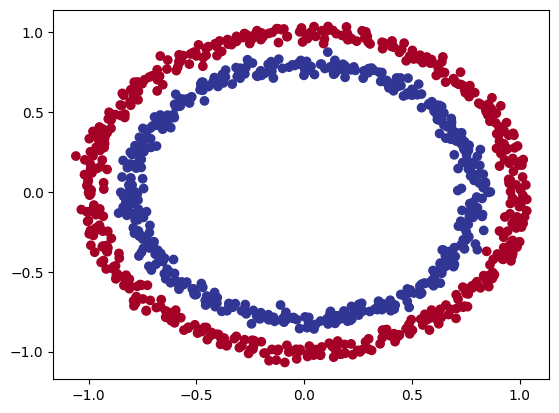

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [22]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(optimizer=tf.keras.optimizers.SGD(), 
                loss=tf.keras.losses.BinaryCrossentropy, 
                metrics=['accuracy']
                )

history = model_1.fit(X, y, epochs=1000, verbose=0 )

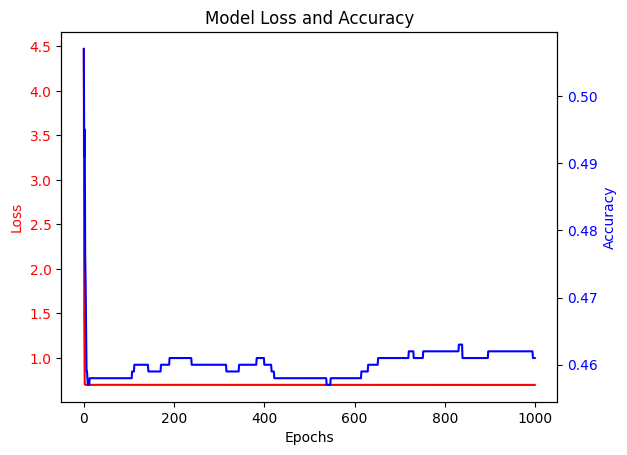

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert history to a DataFrame
df = pd.DataFrame(history.history)

# Create a figure and one set of axes
fig, ax1 = plt.subplots()

# Plot loss on ax1
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
df['loss'].plot(ax=ax1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create another axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='blue')
df['accuracy'].plot(ax=ax2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Model Loss and Accuracy')
plt.show()

In [24]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4969 - loss: 0.6925


[0.69359290599823, 0.4819999933242798]

In [ ]:
####

In [28]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss=tf.keras.losses.BinaryCrossentropy, 
                metrics=['accuracy']
                )

history = model_2.fit(X, y, epochs=100, verbose=0 )

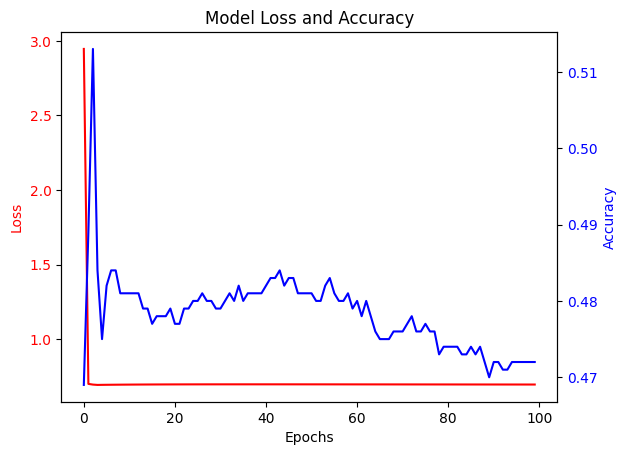

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert history to a DataFrame
df = pd.DataFrame(history.history)

# Create a figure and one set of axes
fig, ax1 = plt.subplots()

# Plot loss on ax1
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
df['loss'].plot(ax=ax1, color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create another axis for accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='blue')
df['accuracy'].plot(ax=ax2, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Model Loss and Accuracy')
plt.show()

In [30]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5049 - loss: 0.6917


[0.6950144171714783, 0.4880000054836273]

In [31]:
import numpy as np

def plot_decision_boundaries(model, X, y):
    """
    Plot the decision boundaries of the model predicting on X
    :param model: model
    :param X: X
    :param y: y
    :return: 
    """
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)
    
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


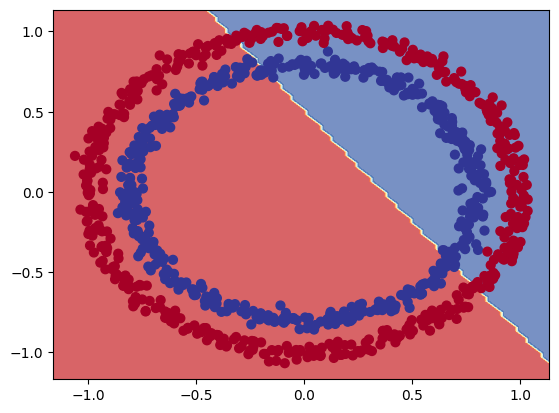

In [33]:
plot_decision_boundaries(model_2, X, y)

In [49]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(1, )),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
                

X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y= X+100


X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


history3 =  model_3.fit(
    tf.expand_dims(X_reg_train, axis=-1), 
    y_reg_train, 
    epochs=100
)

Epoch 1/100


C:\code\tesnorflow-udemy\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 450.1884 - mae: 450.1884  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 330.8941 - mae: 330.8941 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 209.9805 - mae: 209.9805 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 87.6607 - mae: 87.6607   
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 63.2732 - mae: 63.2732 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 87.2987 - mae: 87.2987 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 63.1910 - mae: 63.1910 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42.7631 - mae: 42.7631 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 46.9635 - mae: 46.9635 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.1814 - mae: 41.1814 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.2132 - mae: 43.2132 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40.1457 - mae: 40.1457 
Epoch 13/100
5/5 ━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


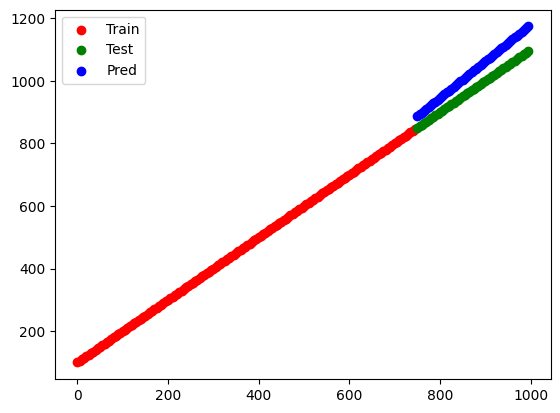

In [48]:
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

plt.scatter(X_reg_train, y_reg_train, color='red', label='Train')
plt.scatter(X_reg_test, y_reg_test, color='green', label='Test')
plt.scatter(X_reg_test, y_reg_preds, color='blue', label='Pred')
plt.legend()

Text(0.5, 0, 'epochs')

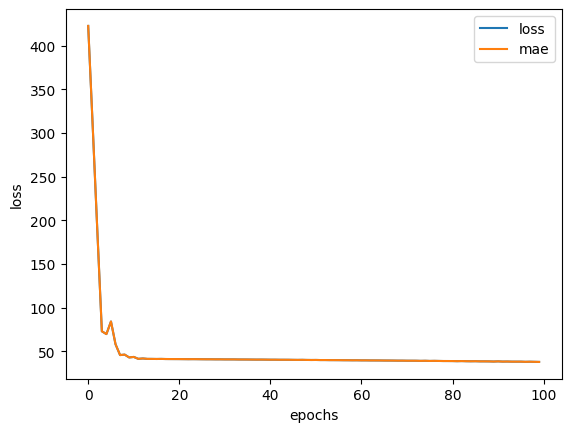

In [50]:
pd.DataFrame(history3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')